# Chapter 7: Neural Networks

## A Simple Neural Network
### Activation Functions
##### Example 7-1. Plotting ReLu function

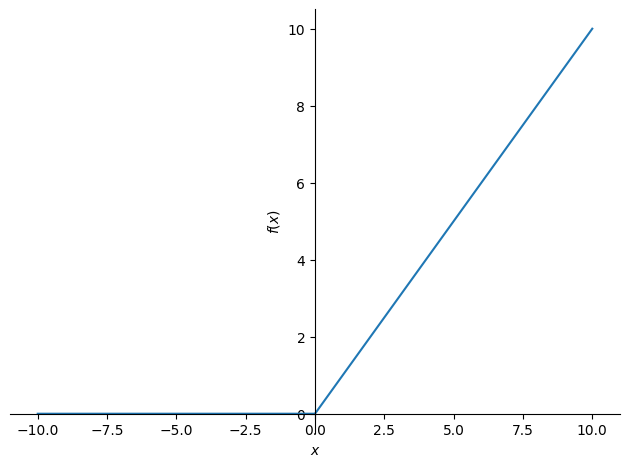

In [1]:
from sympy import *

# Plot ReLu
x = symbols('x')
relu = Max(0,x)
plot(relu)

##### Example 7-2. Logistic activation function in SymPy

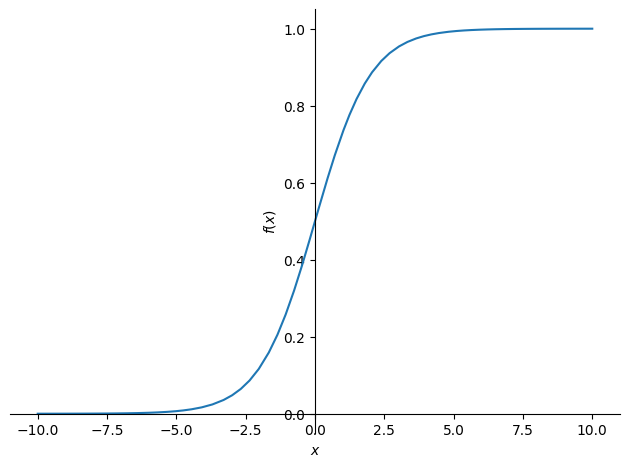

In [2]:
# Plot Logistic
x = symbols('x')
logistic = 1 / (1 + exp(-x))
plot(logistic)

### Forward Propagation
##### Example 7-3. A simple forward propagation network with random weights and biases

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('https://tinyurl.com/y2qmhfsr', delimiter=',')

# Extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:,0:3].values / 255)
all_outputs = all_data.iloc[:,-1].values

# Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)
n = X_train.shape[0]

# Build neural network with weights and biases with random initialization
w_hidden = np.random.rand(3,3)
w_output = np.random.rand(1,3)

b_hidden = np.random.rand(3,1)
b_output = np.random.rand(1,1)

# Activation functions
relu = lambda x: np.maximum(x,0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only output layer, A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Accuracy: ", accuracy)

Accuracy:  0.6258351893095758


##### Example 7-4. The weight matrices and bias vectors in NumPy

In [6]:
# Build neural network with weights and biases with random initialization
w_hidden = np.random.rand(3,3)
w_output = np.random.rand(1,3)

b_hidden = np.random.rand(3,1)
b_output = np.random.rand(1,1)

##### Example 7-5. The activation functions and forward propagation function for out neural network

In [7]:
# ACtivation functions
relu = lambda x: np.maximum(x,0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

##### Examle 7-6. Calculating accuracy

In [9]:
# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Accuracy: ", accuracy)

Accuracy:  0.6258351893095758
